# Machine Learning Practicum: Heart Disease Dataset
In this practicum, we will explore the Heart Disease dataset using unsupervised learning methods and then apply a supervised learning algorithm.
We will:
1. Use PCA and clustering to explore the data in an unsupervised manner.
2. Apply a Random Forest classifier to predict the presence of heart disease.
Let's begin by loading the dataset.

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
np.seterr(divide='ignore', over='ignore', invalid='ignore')

try:
    import google.colab
    REPO_URL = "https://github.com/nd-cse-30124-fa25/cse-30124-homeworks.git"
    REPO_NAME = "cse-30124-homeworks"
    HW_FOLDER = "practicum" 

    # Clone repo if not already present
    if not os.path.exists(REPO_NAME):
        !git clone {REPO_URL}

    # cd into the homework folder
    %cd {REPO_NAME}/{HW_FOLDER}

except ImportError:
    pass

# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
# Load Heart Disease dataset
# df = pd.read_csv(url, names=col_names, na_values='?')
df = pd.read_csv('./heart.csv', names=col_names, na_values='?')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


## Dataset Overview
The Heart Disease dataset contains 303 samples with 14 features. The task is to classify whether a patient has heart disease (binary classification). Let's take a quick look at the structure of the dataset.

In [15]:
# Assuming df is your DataFrame and 'target' is your target column
# Number of samples
num_samples = df.shape[0]

# Number of features (excluding the target column)
num_features = df.shape[1] - 1  # Subtract 1 for the target column

# Number of unique target values
num_unique_targets = df['target'].nunique()

# Unique target values and their counts
unique_target_values = df['target'].value_counts()

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")
print(f"Number of unique target values: {num_unique_targets}")
print("\nUnique target values and their counts:")
print(unique_target_values)

Number of samples: 303
Number of features: 13
Number of unique target values: 5

Unique target values and their counts:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [16]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [17]:
# Fill missing values with the median for simplicity
df.fillna(df.median(), inplace=True)

## TODO:  Standardize the Data
We'll standardize the feature values to make them suitable for PCA and clustering.

In [ ]:
from sklearn.preprocessing import StandardScaler

# TODO: Scale the dataset

## TODO: Visualizing the dataset

Lets see if our classes are visually differentiable in 2D. We can go about this seveal ways.

Let's start with PCA

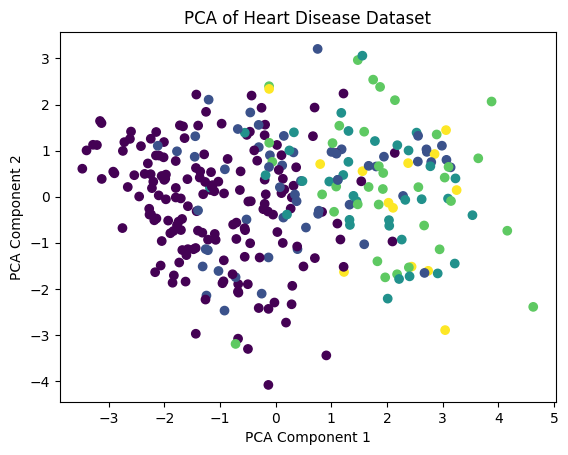

In [ ]:
from sklearn.decomposition import PCA

# TODO: Use PCA to reduce to 2D for visualization

# Plot PCA result
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['target'])
plt.title('PCA of Heart Disease Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


That looks a little messy, let's try t-SNE as well!

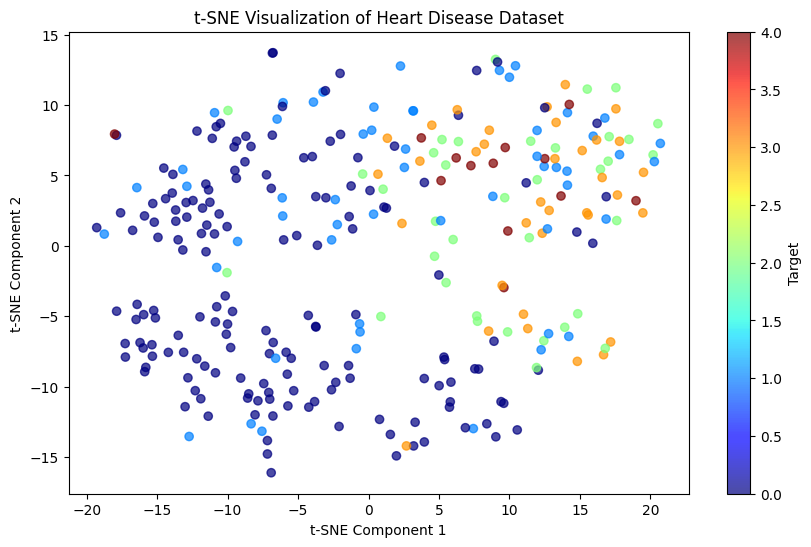

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# TODO: Apply t-SNE to the scaled dataset

# Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['target'], cmap='jet', alpha=0.7)
plt.colorbar(label='Target')
plt.title('t-SNE Visualization of Heart Disease Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Well things are certainly more spread out than in PCA but I don't really see any clear clusters. However we can try clustering with K-Means and see if we can find any, no need to just guess visually!

## TODO: Cluster the dataset

Lets try kmeans on the scaled dataset with k = 5, because we have 5 unique labels in the target column.
We can then plot it using the PCA values to see our results in 2D!

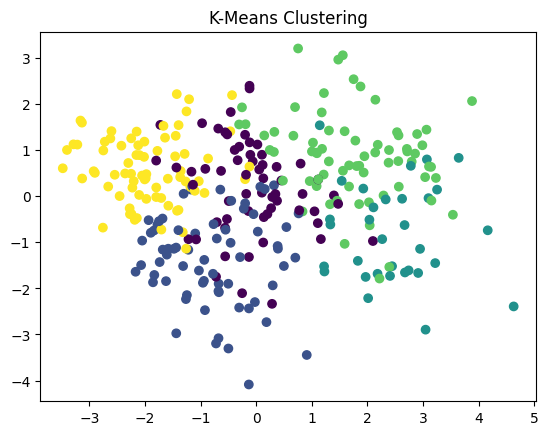

In [ ]:
from sklearn.cluster import KMeans

# TODO: Apply K-Means

# Plot K-Means result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans)
plt.title('K-Means Clustering')
plt.show()

There's definitely some clear groupings here, but that's kind of to be expected with kmeans, since it will always force an answer.

## TODO: Supervised Classifiers

The kmeans results seem to indicate that there is some differentiability in the data, so let's try a few classifiers and see how they perform!

Let's start with an SVM and perform a grid search to find the best parameters!

    accuracy param_kernel  param_C  param_degree param_gamma
20  0.584828          rbf      1.0             2       scale
32  0.584828          rbf      1.0             4       scale
23  0.584828          rbf      1.0             2        auto
26  0.584828          rbf      1.0             3       scale
29  0.584828          rbf      1.0             3        auto
35  0.584828          rbf      1.0             4        auto
21  0.570764       linear      1.0             2        auto
24  0.570764       linear      1.0             3       scale
30  0.570764       linear      1.0             4       scale
27  0.570764       linear      1.0             3        auto
18  0.570764       linear      1.0             2       scale
33  0.570764       linear      1.0             4        auto
36  0.570764       linear     10.0             2       scale
39  0.570764       linear     10.0             2        auto
42  0.570764       linear     10.0             3       scale
45  0.570764       linea

/Users/wtheisen/Dropbox/linux_files/programs/cse-30124-homeworks/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wtheisen/Dropbox/linux_files/programs/cse-30124-homeworks/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wtheisen/Dropbox/linux_files/programs/cse-30124-homeworks/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

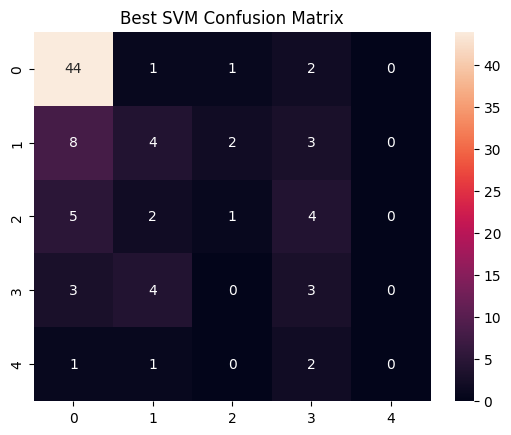

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Define the SVM model

# TODO: Define the parameter grid to search

# TODO: Initialize GridSearchCV with cross-validation

# TODO: Fit the grid search to the training data

# Extract results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns and rename 'mean_test_score' to 'accuracy'
results = results[['mean_test_score', 'param_kernel', 'param_C', 'param_degree', 'param_gamma']]
results.rename(columns={'mean_test_score': 'accuracy'}, inplace=True)

# Fill NaN values for non-applicable parameters with 'None' for clarity
results.fillna('None', inplace=True)

# Reorder columns to make 'accuracy' the first column
results = results[['accuracy', 'param_kernel', 'param_C', 'param_degree', 'param_gamma']]

# Sort by accuracy
results = results.sort_values(by='accuracy', ascending=False)

# Print the table with all columns
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
print(results)

# Print the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Use the best estimator to make predictions
best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

# TODO: Display classification report for the best SVM model

# TODO: Confusion matrix for the best SVM model

sns.heatmap(cm_best_svm, annot=True, fmt='d')
plt.title('Best SVM Confusion Matrix')
plt.show()


Shockingly the Radial Basis Function kernel performed the best, but there's kind of a problem with our dataset. Our class distributions are really imbalanced and that makes it harder to learn things.

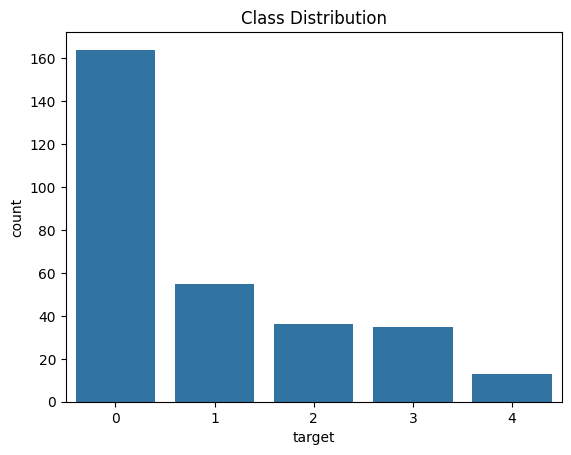

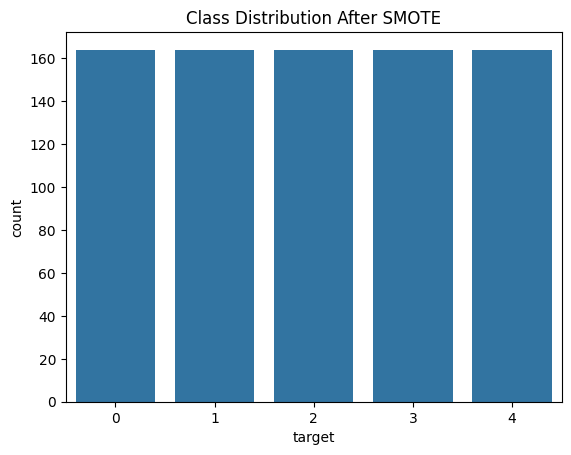

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# EDA: Check class distribution
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

X = df.drop(columns='target')
y = df['target']

# TODO: Standardize features

# TODO: Apply SMOTE

# Check new class distribution
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

So now we have a dataset that's balanced, by creating synthetic samples for the classes that had fewer samples. Lets see if that makes any difference! While we're at it, let's also try a few more classifiers!

## TODO: Test classifiers

In addition to the RBF SVM, lets try Logistic Regression, KNN, Decision Trees, and Naive Bayes.


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define a function to evaluate different models with additional strategies
def evaluate_models(X, y):
    # TODO: List of models to evaluate
    
    # TODO: Feature selection

    # TODO: Dimensionality reduction

    # TODO: Evaluate each model
    for name, model in models.items():
        
        # TODO: Perform cross-validation
        
        print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Evaluate models on the scaled dataset
print('Imbalanced Results:')
evaluate_models(X_scaled, df['target'])

print('-'*80)

# Evaluate models on the resampled dataset
print('Balanced Results:')
evaluate_models(X_resampled, y_resampled)

Logistic Regression Accuracy: 0.58 (+/- 0.10)
SVM (RBF Kernel) Accuracy: 0.57 (+/- 0.04)
KNN Accuracy: 0.57 (+/- 0.05)
Decision Trees Accuracy: 0.58 (+/- 0.07)
Naive Bayes Accuracy: 0.59 (+/- 0.06)
--------------------------------------------------------------------------------
Logistic Regression Accuracy: 0.54 (+/- 0.08)
SVM (RBF Kernel) Accuracy: 0.76 (+/- 0.06)
KNN Accuracy: 0.78 (+/- 0.10)
Decision Trees Accuracy: 0.47 (+/- 0.06)
Naive Bayes Accuracy: 0.53 (+/- 0.06)


While balancing the classes didn't help every method equally, it greatly improved the SVM's and KNN's performance.

Unfortunately though, none of these classifiers were able to get to the 80% accuracy that the Dogtors wanted and so maybe we can't save any pets after all :(

## TODO: Neural Network

As a shot in the dark though, you decide to ask chat to generate you a neural network, surely deep learning and "real AI" will be able to save the day!

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def make_loader(X, y, batch_size=32, shuffle=False):
    X_t = torch.tensor(X, dtype=torch.float32)
    y_t = torch.tensor(y.values, dtype=torch.long)
    return DataLoader(TensorDataset(X_t, y_t), batch_size=batch_size, shuffle=shuffle)

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(
    X_scaled, df['target'], test_size=0.3, random_state=42
)

train_loader_u = make_loader(X_train, y_train, shuffle=True)
test_loader_u  = make_loader(X_test, y_test)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

train_loader_b = make_loader(X_train, y_train, shuffle=True)
test_loader_b  = make_loader(X_test, y_test)

# TODO: Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()

    def forward(self, x):
        pass

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(df['target'].unique())

# TODO: Initialize model, criterion, optimizer, and epochs

def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, epochs=100):
    results = []
    for run in range(10):
        # Training loop
        num_epochs = epochs
        for epoch in range(num_epochs):
            model.train()
            for X_batch, y_batch in train_loader:
                # Forward pass
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                
                # Backward pass and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                _, predicted = torch.max(outputs.data, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

            print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')
            results.append(100 * correct / total)

    print(f'Average accuracy over {len(results)} runs: {np.mean(results):.2f}%')

print("Unbalanced Dataset Results:")
train_and_evaluate(model, train_loader_u, test_loader_u, criterion, optimizer)

print('-'*80)

print("Balanced Dataset Results:")
train_and_evaluate(model, train_loader_b, test_loader_b, criterion, optimizer)

Accuracy of the model on the test set: 79.27%
Accuracy of the model on the test set: 79.27%
Accuracy of the model on the test set: 83.74%
Accuracy of the model on the test set: 84.15%
Accuracy of the model on the test set: 82.93%
Accuracy of the model on the test set: 82.93%
Accuracy of the model on the test set: 82.93%
Accuracy of the model on the test set: 82.52%
Accuracy of the model on the test set: 82.11%
Accuracy of the model on the test set: 82.11%
Average accuracy over 10 runs: 82.20%


#### OH MY GOODNESS WE DID IT

Would you look at that, we were able to just scrape above 80% accuracy, and this was with maybe the simplest possible neural network.

But wait, the Dogtors maybe don't want to use lots of fancy GPUs to train their model. It turns out there's another technique we could use!

## TODO: Ensemble Classifiers

We could use an ensemble of classifiers!

Let's try an ensemble of Logistic Regression, Random Forest, and Gradient Boosting.



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define a function to evaluate different models with additional strategies
def evaluate_models(X, y):    
    # TODO: Feature selection

    # TODO: Dimensionality reduction

    # TODO: Ensemble method: Voting Classifier
    
    # TODO: Create a pipeline for the ensemble

    # TODO: Perform cross-validation for the ensemble

    print(f"Ensemble (Voting) Accuracy: {ensemble_scores.mean():.2f} (+/- {ensemble_scores.std() * 2:.2f})")

# Evaluate models on the scaled dataset
print('Imbalanced Results:')
evaluate_models(X_scaled, df['target'])

print('-'*80)

# Evaluate models on the resampled dataset
print('Balanced Results:')
evaluate_models(X_resampled, y_resampled)

Imbalanced Results:
Ensemble (Voting) Accuracy: 0.61 (+/- 0.08)
--------------------------------------------------------------------------------
Balanced Results:
Ensemble (Voting) Accuracy: 0.83 (+/- 0.06)


## Wrap-Up
In this practicum, we applied both unsupervised (PCA and clustering) and supervised (Random Forest) methods to the Heart Disease dataset. By first exploring the data using unsupervised techniques, we were able to gain insights that informed our supervised task.